net_p {'gpu_id': 0, 'net_name': 'composition', 'net_list': [{'net_name': 'DMF', 'sizes': [256, 256, 256], 'gpu_id': 0, 'std_w': 0.001}], 'clip_if': False, 'clip_min': 0.0, 'clip_max': 1.0, 'clip_mode': 'hard'}
reg_p {'reg_name': 'MultiReg', 'reg_list': [{'reg_name': 'AIR', 'coef': 0.1, 'n': 256, 'mode': 0, 'lap_k': 1, 'x_trans': 'ori', 'factor': 1, 'patch_size': 16, 'stride': 16, 'sparse_index': None}, {'reg_name': 'AIR', 'coef': 0.1, 'n': 256, 'mode': 1, 'lap_k': 1, 'x_trans': 'ori', 'factor': 1, 'patch_size': 16, 'stride': 16, 'sparse_index': None}], 'gpu_id': 0, 'x_trans': 'ori', 'factor': 1, 'patch_size': 16, 'stride': 16, 'sparse_index': None}
data_p {'data_shape': (256, 256), 'random_rate': 0.5, 'pre_full': True, 'mask_type': 'img', 'data_path': './data/img/man.bmp', 'data_type': 'gray_img', 'mask_path': './data/mask/mask.png', 'down_sample': [1, 1, 1], 'mask_shape': 'same', 'seeds': 88, 'down_sample_rate': 2, 'mask_unobs_path': None, 'noise_mode': None, 'noise_parameter': 0.0, '

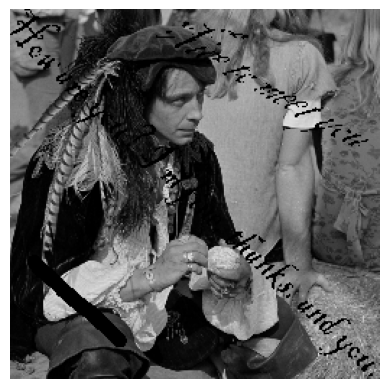

loss on test set 0.014250112697482109
PSNR= 17.78925323486328 dB
NMAE= 0.1361444741487503
RMSE= 0.16689062118530273
loss of regularizer tensor(0.0028, device='cuda:0', grad_fn=<AddBackward0>)


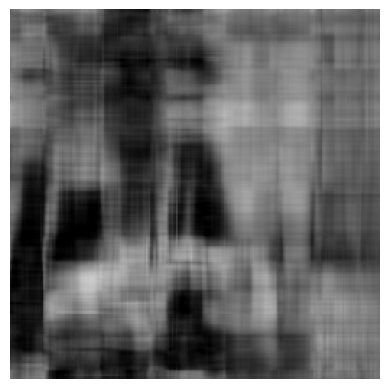

loss on test set 0.003064041491597891
PSNR= 24.464492797851562 dB
NMAE= 0.10598418116569519
RMSE= 0.14095483720302582
loss of regularizer tensor(0.0018, device='cuda:0', grad_fn=<AddBackward0>)


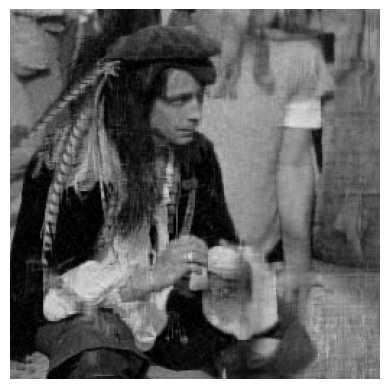

loss on test set 0.0010161239188164473
PSNR= 29.25796890258789 dB
NMAE= 0.09943721443414688
RMSE= 0.13302697241306305
loss of regularizer tensor(0.0007, device='cuda:0', grad_fn=<AddBackward0>)


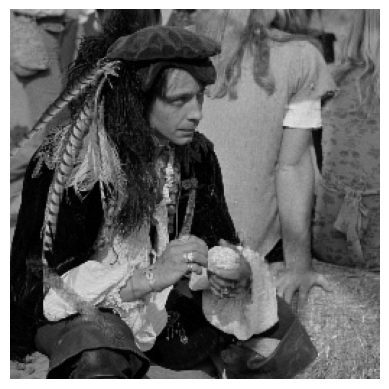

loss on test set 0.0007958437781780958
PSNR= 30.31915855407715 dB
NMAE= 0.09910549223423004
RMSE= 0.1322995126247406
loss of regularizer tensor(0.0002, device='cuda:0', grad_fn=<AddBackward0>)


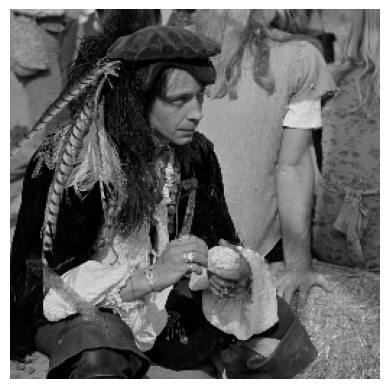

loss on test set 0.0008068234892562032
PSNR= 30.25965118408203 dB
NMAE= 0.10134966671466827
RMSE= 0.13414616882801056
loss of regularizer tensor(5.4791e-05, device='cuda:0', grad_fn=<AddBackward0>)


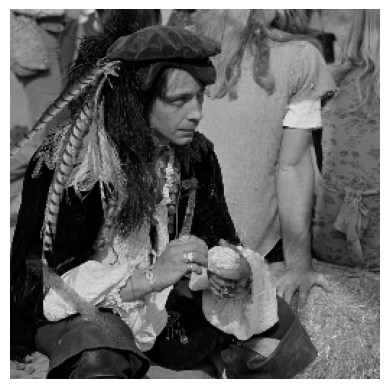

loss on test set 0.0008292401907965541
PSNR= 30.14063262939453 dB
NMAE= 0.10321542620658875
RMSE= 0.13604409992694855
loss of regularizer tensor(2.1545e-05, device='cuda:0', grad_fn=<AddBackward0>)


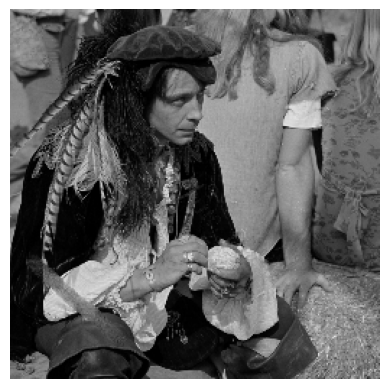

loss on test set 0.0008545167511329055
PSNR= 30.010231018066406 dB
NMAE= 0.10543911904096603
RMSE= 0.13810855150222778
loss of regularizer tensor(9.6898e-06, device='cuda:0', grad_fn=<AddBackward0>)


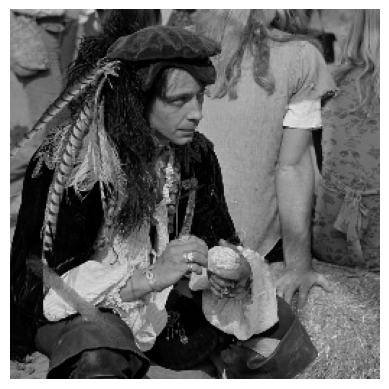

loss on test set 0.0008781278738752007
PSNR= 29.891860961914062 dB
NMAE= 0.10756497830152512
RMSE= 0.14000405371189117
loss of regularizer tensor(4.7875e-06, device='cuda:0', grad_fn=<AddBackward0>)


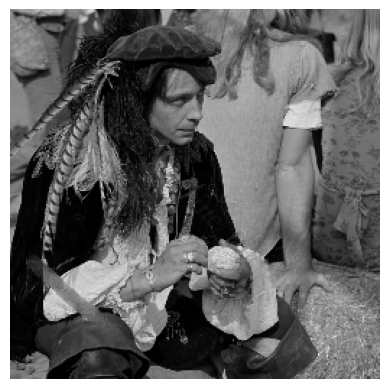

loss on test set 0.0008950709598138928
PSNR= 29.808862686157227 dB
NMAE= 0.10909778624773026
RMSE= 0.14134803414344788
loss of regularizer tensor(2.6242e-06, device='cuda:0', grad_fn=<AddBackward0>)


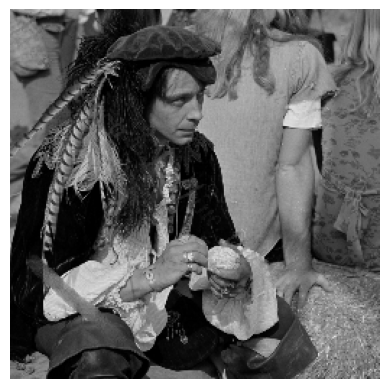

loss on test set 0.000904821848962456
PSNR= 29.76180648803711 dB
NMAE= 0.10997924953699112
RMSE= 0.14211615920066833
loss of regularizer tensor(1.6120e-06, device='cuda:0', grad_fn=<AddBackward0>)


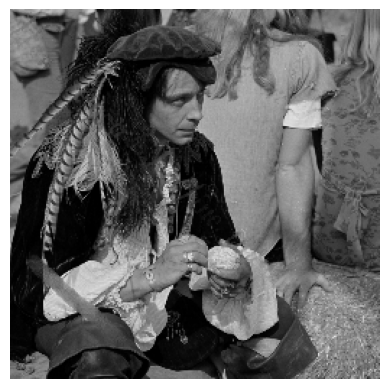

In [3]:
# DMF+AIR
import rss

parameters = {}
net_list = []
net_list.append({'net_name':'DMF','sizes':[256,256,256]})
gpu_id = 0

parameters['net_p'] = {'gpu_id':gpu_id,'net_name':'composition','net_list':net_list}
parameters['data_p'] = {'data_shape':(256,256),'random_rate':0.5,
                        'pre_full':True,'mask_type':'img','data_path':'./data/img/man.bmp','data_type':'gray_img', 'mask_path': './data/mask/mask.png'}
parameters['train_p'] = {'train_epoch':2000}
parameters['show_p'] = {'show_type':'gray_img','show_content':'original'}
grop_reg = {'reg_name':'GroupReg','coef':1e-2,
                       'group_para':{'n_clusters':22,'metric':'cosine','reg_mode':'single'},
                       'each_reg_name':'INRR','start_epoch':100,'gpu_id':gpu_id,'w0_initial':1.,
                       'x_trans':'patch','stride': 13,'patch_size':16,'search_epoch':1e2,'filter_type':None,'sigma':1e0,'lap_k':3}
tv_reg = {'reg_name': 'TV', 'coef':1e-3,'p_norm': 1}
huber_tv_reg = {'reg_name': 'TV', 'coef':1e-1,'lap_mode':'Huber','huber_delta':0.1}
wtv_reg = {'reg_name': 'WTV', 'coef':1e-2}
inrr_reg = {'reg_name':'MultiReg','reg_list':[{'reg_name':'INRR','coef':1e-2,'n':256,'mode':0,'w0_initial':1.,'lap_k':1},
                                              {'reg_name':'INRR','coef':1e-2,'n':256,'mode':1,'w0_initial':1.,'lap_k':1}]}
huber_reg = {'reg_name':'MultiReg','reg_list':[{'reg_name':'INRR','coef':1e-2,'n':256,'mode':0,'w0_initial':1.,'lap_k':1,'lap_mode':'Huber','huber_delta':0.1},
                                              {'reg_name':'INRR','coef':1e-2,'n':256,'mode':1,'w0_initial':1.,'lap_k':1,'lap_mode':'Huber','huber_delta':0.1}]}
logcosh_reg = {'reg_name':'MultiReg','reg_list':[{'reg_name':'INRR','coef':1e-2,'n':256,'mode':0,'w0_initial':1.,'lap_k':1,'lap_mode':'logcosh','huber_delta':0.3},
                                              {'reg_name':'INRR','coef':1e-2,'n':256,'mode':1,'w0_initial':1.,'lap_k':1,'lap_mode':'logcosh','huber_delta':0.3}]}
quantile_reg = {'reg_name':'MultiReg','reg_list':[{'reg_name':'INRR','coef':1e-2,'n':256,'mode':0,'w0_initial':1.,'lap_k':1,'lap_mode':'quantile','quantile_q':0.5},
                                              {'reg_name':'INRR','coef':1e-2,'n':256,'mode':1,'w0_initial':1.,'lap_k':1,'lap_mode':'quantile','quantile_q':0.5}]}
huber_grop_reg = {'reg_name':'GroupReg','coef':1e-2,
                       'group_para':{'n_clusters':22,'metric':'cosine','reg_mode':'single'},
                       'each_reg_name':'INRR','start_epoch':100,'gpu_id':gpu_id,'w0_initial':1.,
                       'x_trans':'patch','stride': 13,'patch_size':16,'search_epoch':1e2,'filter_type':None,'sigma':1e0,'lap_k':1,'lap_mode':'Huber','huber_delta':0.1}
air_reg = {'reg_name':'MultiReg','reg_list':[{'reg_name':'AIR','coef':1e-1,'n':256,'mode':0},{'reg_name':'AIR','coef':1e-1,'n':256,'mode':1}]}
parameters['reg_p'] = air_reg
#parameters['reg_p'] = {'reg_name':'MultiReg','reg_list':[{'reg_name':'INRR','coef':1e-2,'n':256,'mode':0},{'reg_name':'INRR','coef':1e-2,'n':256,'mode':1}]}
# grop_reg = {'reg_name':'GroupReg','coef':1e-2,
#                        'group_para':{'n_clusters':22,'metric':'cosine','reg_mode':'single'},
#                        'each_reg_name':'INRR','start_epoch':100,'gpu_id':gpu_id,'w0_initial':5.,
#                        'x_trans':'patch','stride': 4,'patch_size':8,'search_epoch':1e6,'filter_type':'gaussian','sigma':1}
parameters['opt_p'] = {'reg': {'opt_name': 'Adam', 'lr': 1e-3, 'weight_decay': 0}}
rssnet = rss.rssnet(parameters)

rssnet.show()
rssnet.show_p['show_content'] = 'recovered'
for i in range(10):
    rssnet.train()
    rssnet.show()